In [32]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


In [3]:
olympic_df = pd.read_csv("../Data/archive/athlete_events.csv")

sorted_df =  olympic_df.sort_values(by='Year', ascending=False) # sorting by most recent year
cleaned_df = sorted_df.drop_duplicates(subset='Name', keep='first') # cleaning up df by removing duplicate names 

# olympic_df.head(30)


In [21]:
# cleaned_df.nsmallest(20, "Weight") # smallest weight value is 25 

def weight_range(weight, range_size=5, min_weight=0):
    lower_bound = min_weight
    upper_bound = min_weight + range_size
    
    while weight >= upper_bound:
        lower_bound = upper_bound
        upper_bound += range_size
    
    return f"{lower_bound}-{upper_bound}"

Weight_df = cleaned_df
Weight_df['Weight_Range'] = cleaned_df['Weight'].apply(weight_range, range_size=5, min_weight=cleaned_df['Weight'].min())

columns_to_keep = ['Name', 'Sex', 'Weight', 'Weight_Range', 'Sport']
Weight_df = Weight_df[columns_to_keep]  
Weight_df = Weight_df.dropna()


Weight_df_male = Weight_df[Weight_df["Sex"] == "M"]
Weight_df_female = Weight_df[Weight_df["Sex"] == "F"]

# Weight_df
# Weight_df_male
Weight_df_female




/var/folders/3w/q_m3rh1s5xv5bh0kfpcqmd9r0000gn/T/ipykernel_88713/4143958767.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Weight_df['Weight_Range'] = cleaned_df['Weight'].apply(weight_range, range_size=5, min_weight=cleaned_df['Weight'].min())


,Name,Sex,Weight,Weight_Range,Sport
90507,Sophie Elizabeth Hansson,F,74.0,70.0-75.0,Swimming
242603,Kira Toussaint,F,72.0,70.0-75.0,Swimming
193130,Nadja Pries,F,56.0,55.0-60.0,Cycling
169232,Salma Negmeldin,F,49.0,45.0-50.0,Synchronized Swimming
17187,Charlotte Becker,F,64.0,60.0-65.0,Cycling
...,...,...,...,...,...
213304,"Helene Hermine ""Leni"" Schmidt (-Fischer)",F,60.0,60.0-65.0,Athletics
133242,Lucienne Germaine Georgette Laudr (-Viel),F,52.0,50.0-55.0,Athletics
61309,"Gertrude Caroline ""Trudy"" Ederle",F,64.0,60.0-65.0,Swimming
77535,"Adelaide Josephine ""Adeline"" Gehrig (-Pilke)",F,67.0,65.0-70.0,Fencing


In [22]:
cleaned_df.to_csv("/Users/nathanglen/Project3DSA/Project3/Data/archive/cleaned_data.csv", index=False)

In [34]:
# Filter out rows with NaN values in 'Weight_Range' and 'Sport' columns
Weight_df_male = Weight_df_male.dropna(subset=['Weight_Range', 'Sport'])

# Create an undirected graph
G = nx.Graph()

# Add nodes based on Weight_Range
weight_ranges = Weight_df_male['Weight_Range'].unique()
G.add_nodes_from(weight_ranges)

# Iterate over unique sport values
for sport in Weight_df_male['Sport'].unique():
    # Filter DataFrame for rows with the current sport
    sport_df = Weight_df_male[Weight_df_male['Sport'] == sport]
    # Get unique Weight_Ranges for the current sport
    sport_weight_ranges = sport_df['Weight_Range'].unique()
    # Add edges between nodes with the same sport
    for i in range(len(sport_weight_ranges)):
        for j in range(i+1, len(sport_weight_ranges)):
            G.add_edge(sport_weight_ranges[i], sport_weight_ranges[j])

# Print the edge list
print("Edge list:")
for edge in G.edges():
    print(edge)

Edge list:
('95.0-100.0', '85.0-90.0')
('95.0-100.0', '100.0-105.0')
('95.0-100.0', '90.0-95.0')
('95.0-100.0', '70.0-75.0')
('95.0-100.0', '75.0-80.0')
('95.0-100.0', '105.0-110.0')
('95.0-100.0', '55.0-60.0')
('95.0-100.0', '80.0-85.0')
('95.0-100.0', '110.0-115.0')
('95.0-100.0', '50.0-55.0')
('95.0-100.0', '65.0-70.0')
('95.0-100.0', '60.0-65.0')
('95.0-100.0', '45.0-50.0')
('95.0-100.0', '40.0-45.0')
('95.0-100.0', '35.0-40.0')
('95.0-100.0', '135.0-140.0')
('95.0-100.0', '130.0-135.0')
('95.0-100.0', '125.0-130.0')
('95.0-100.0', '115.0-120.0')
('95.0-100.0', '120.0-125.0')
('95.0-100.0', '150.0-155.0')
('95.0-100.0', '145.0-150.0')
('95.0-100.0', '180.0-185.0')
('95.0-100.0', '140.0-145.0')
('95.0-100.0', '155.0-160.0')
('95.0-100.0', '165.0-170.0')
('95.0-100.0', '160.0-165.0')
('95.0-100.0', '170.0-175.0')
('95.0-100.0', '175.0-180.0')
('95.0-100.0', '25.0-30.0')
('95.0-100.0', '210.0-215.0')
('95.0-100.0', '195.0-200.0')
('75.0-80.0', '85.0-90.0')
('75.0-80.0', '100.0-105.0')

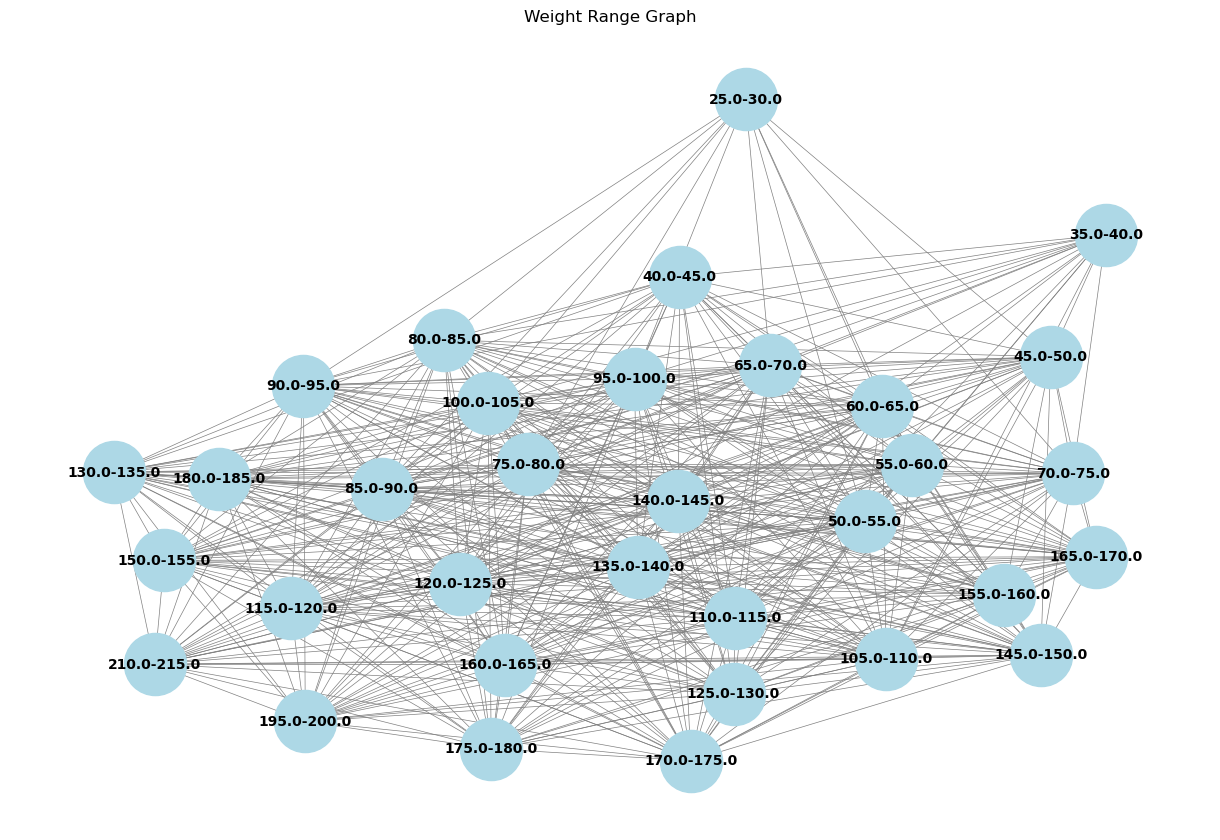

In [35]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.3, iterations=50)  # graph layout
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', width=0.5)
plt.title('Weight Range Graph')
plt.show()